# Деревья решений. Классификация

## 1. Критерий информативности с нуля

построение дерева зависит от следующих факторов:
* вид правила разбиения
* критерий информативности
* критерий останова
* проблема пропусков

рассмотрим критерии информативности

In [1]:
import numpy as np
from collections import Counter
import math

In [2]:
Counter([9,9,9,7,7,3,3,3,4,4])

Counter({9: 3, 7: 2, 3: 3, 4: 2})

*Нам понадобятся две библиотеки: numpy, а объект класса Counter в заданном списке просто подсчитывает количество вхождений каждого элемента и возвращает результат в виде словаря. Пример:*

In [3]:
Counter([9,9,9,7,7])

Counter({9: 3, 7: 2})

*Для численного измерения улучшения разбиений на каждом этапе мы вводим некоторый *критерий информативности*, который будет оценивать разнообразие объектов в выборке: чем больше разных классов в выборке, тем больше значение H(R). Чем меньше взвешенное значение критерия после разбиения - тем лучше*

Функция для расчёта энтропийного критерия качества:

$H(R) = -\sum_{k=1}^{K}p_klogp_k$

**Задание.** Дополните функцию расчёта энтропийного критерия множества

In [22]:
def HEntropy(l):
    length = len(l)
   
    cnt = Counter(l).values()
   

    ps = (v / length for v in cnt)
    
    H = -sum(p*math.log2(p) for p in ps)
    return H

In [8]:
HEntropy((1,1,1,1,2,2,2,3,3,3,4))

<generator object HEntropy.<locals>.<genexpr> at 0x000001D81BCC07B0>


1.867633890971212

In [18]:
HEntropy((2,2,2,3,3,3,4))

1.4488156357251847

**Задание.** По аналогии с *энтропийным критерием* заполните функции *критерия Джини*

In [23]:
def HGini(l):
    length = len(l)
    cnt = Counter(l).values()
    
    ps = (v / length for v in cnt)
    H = sum(p*(1-p) for p in ps)
    return H

*Information Gain (IG)* - функционал качества, отвечающий на вопрос, а сколько энтропии мы погасили при определённом разбиении? На каждом шаге разбиения при построении дерева максимизируется IG. Формула для вычисления при критерии информативности H:

$IG(R) = H(R) - \frac{|R_l|}{|R|}H(R_l) - \frac{|R_r|}{|R|}H(R_r)$

**Задание.** Заполните функцию для вычисления функционала качества

In [24]:
def IG(H, l, i):
    length = len(l)
    return H(l) - i/length*H(l[:i]) - (length-i)/length*H(l[i:])

In [9]:
l = (1,2,1,2,1,1,3,3,3)

In [15]:
IG(HGini, l, 6)

0.345679012345679

Функция для визуализации работы произвольного критерия качества на выборке

In [25]:
def test_H(H, l):
    print("{:5} {:3}   {:4} {:4} {:4}".format("#","l","IG","Hl","Hr"))
    print("-"*24)
    for i in range(1,len(l)):
        print("{:2}. {:3}   {:.2f} {:.2f} {:.2f}".format(i, l[i], IG(H, l, i), H(l[:i]), H(l[i:])))

Определим как-нибудь выборку и посмотрим, какое разбиение предложат критерии информативности. Элементы здесь будут выводиться начиная со второго, а значения функций рассчитаны для разбиения *перед* элементом строки

In [26]:
l = [1]*5 + [2]*3 + [1]*4
print(l)

[1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


In [28]:
test_H(HEntropy, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.04 -0.00 0.85
 2.   1   0.08 -0.00 0.88
 3.   1   0.12 -0.00 0.92
 4.   1   0.17 -0.00 0.95
 5.   2   0.24 -0.00 0.99
 6.   2   0.03 0.65 0.92
 7.   2   0.01 0.86 0.72
 8.   1   0.17 0.95 -0.00
 9.   1   0.12 0.92 -0.00
10.   1   0.08 0.88 -0.00
11.   1   0.04 0.85 -0.00


In [29]:
test_H(HGini, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.01 0.00 0.40
 2.   1   0.02 0.00 0.42
 3.   1   0.04 0.00 0.44
 4.   1   0.06 0.00 0.47
 5.   2   0.09 0.00 0.49
 6.   2   0.01 0.28 0.44
 7.   2   0.00 0.41 0.32
 8.   1   0.06 0.47 0.00
 9.   1   0.04 0.44 0.00
10.   1   0.02 0.42 0.00
11.   1   0.01 0.40 0.00


**Задание.** проверьте, какое разбиение будет сделано на втором шаге?

In [30]:
test_H(HGini, l[5:])

#     l     IG   Hl   Hr  
------------------------
 1.   2   0.11 0.00 0.44
 2.   2   0.26 0.00 0.32
 3.   1   0.49 0.00 0.00
 4.   1   0.28 0.38 0.00
 5.   1   0.15 0.48 0.00
 6.   1   0.06 0.50 0.00


## 2. Визуализация принятия решений классификатором sklearn

#### 1. Используем данные о цветках ириса из занятия

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Задание

1. Постройте dataframe

In [8]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([X,y], axis=1)

In [48]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Выведем попарное распределение фичей датасета с раскраской по виду цветка

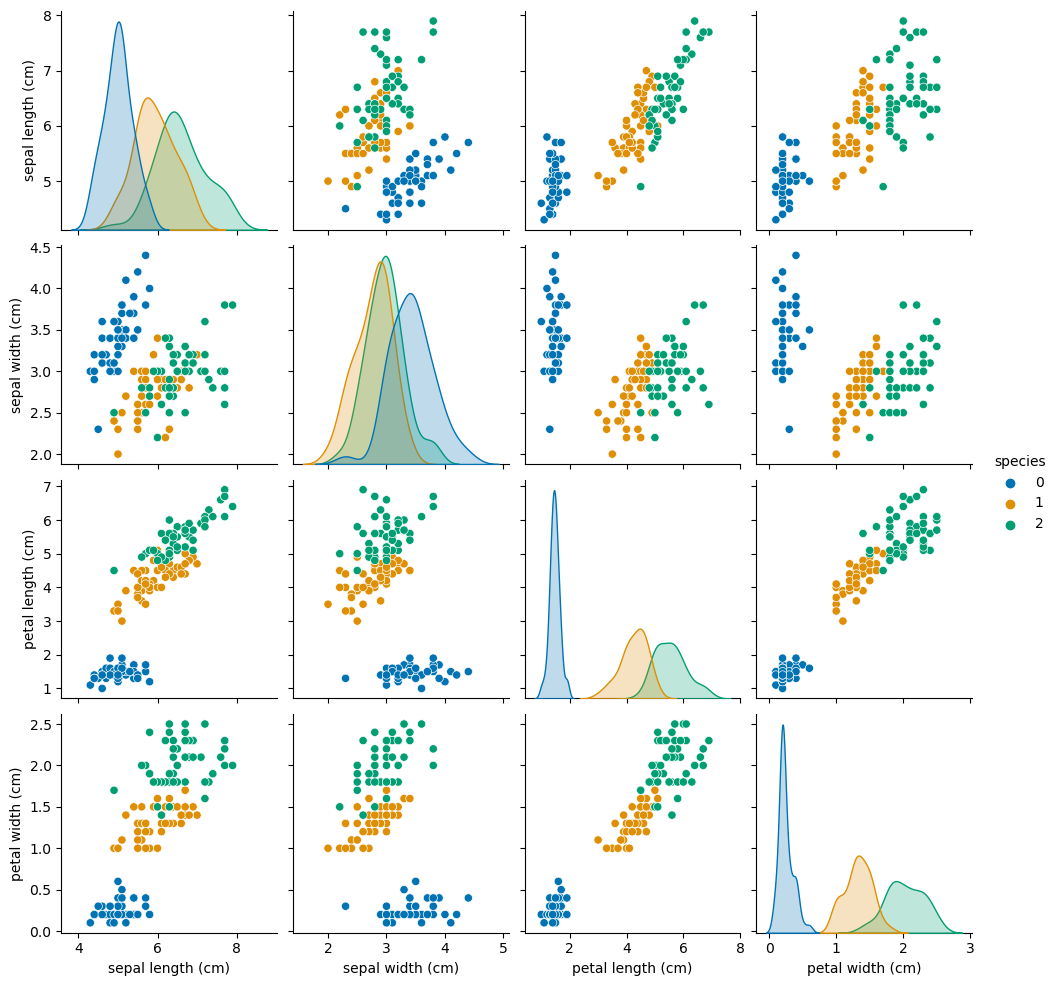

In [9]:
sns.pairplot(df, hue='species', diag_kind="kde", palette="colorblind");

визуально кажется, что ширина листка (petal width) даже самостоятельно может отделить два класса друг от друга идеально, а ещё для двух понадобится хотя бы ещё одна фича.

Возьмём пока для возможности изобразить это в 2D две фичи: длину и ширину листка

In [52]:
Xcut = X[X.columns[2:4]]

#### 2. Используем классификатор

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf = DecisionTreeClassifier()

In [55]:
clf.fit(Xcut, y)

DecisionTreeClassifier()

In [56]:
clf.predict([ [1,1], [3,3] ])

c:\Users\andru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 2])

In [57]:
clf.predict_proba([ [1,1], [3,3] ])

c:\Users\andru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667]])

Можем теперь предсказывать. Давайте визуализируем границу принятия решений. Для удобства экспереминтирования всё упаковано в функцию **test_clf**, в неё передаётся созданный классификатор и при установленном fit_clf=True обучается внутри, а затем отрисовывает границу. Таким образом можно экспериментировать с параметрами классификатора

In [58]:
import numpy as np
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [59]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [60]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c='blue', s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

*попробуйте при разной глубине*

c:\Users\andru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andru\AppData\Local\Temp\ipykernel_16696\936075902.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


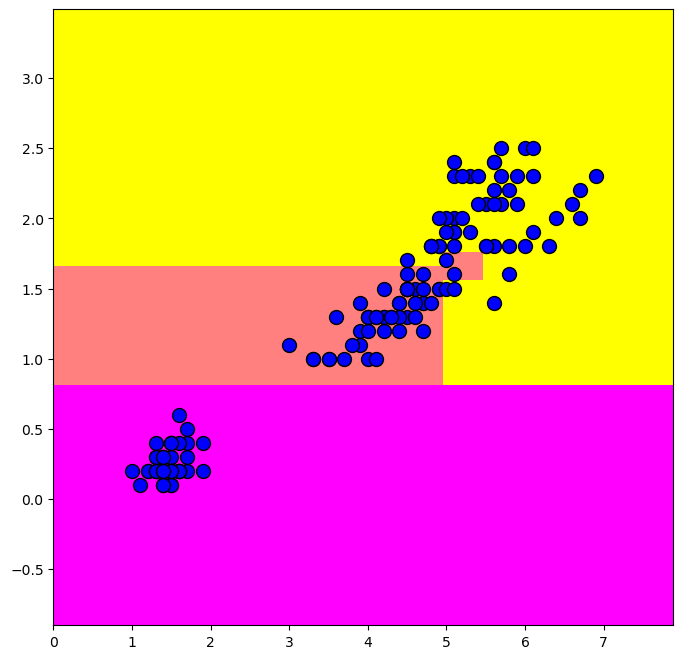

In [61]:
clf = test_clf(DecisionTreeClassifier(), Xcut, y, fit_clf=True)

обратите внимание, один блок занимает то позицию снизу, то слева: данных недостаточно для принятия однозначного решения и экстраполяция идёт произвольно

#### 3. Визуализируем само дерево

Возможно, самое замечательное свойство одиночных деревьев - возможность визуализировать их алгоритм работы и затем объяснить его человеку

Дерево можно отобразить внутри ipython-ноутбука, но сейчас воспользуемся онлайн-сервисом http://www.webgraphviz.com

Сгенерируем код дерева в формате .dot и скопируем его на сайт

In [83]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [84]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xcut, y)

DecisionTreeClassifier(max_depth=3)

In [64]:
get_tree_dot_view(clf, list(Xcut.columns), iris.target_names)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica", fillcolor="#c09cf2"] ;
3 -> 5 ;
6 [label="petal length (cm) <= 4.85\ngini = 0.04

In [65]:
from IPython.display import Image

-----

-----

## 3. Оценка важности фичей

важность зависит от конкретного прогона классификатора, это не объективный показатель, но дающий представление

*попробуйте при разной глубине*

In [86]:
X.shape

(150, 4)

In [87]:
clf.feature_importances_

array([0.        , 0.        , 0.05393633, 0.94606367])

In [88]:
y.shape

(150, 1)

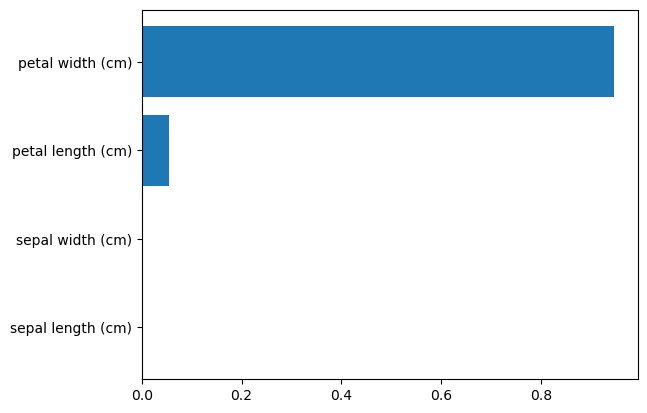

In [85]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);


## 4. Переообучение наглядно

In [68]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = pd.DataFrame(train_data)

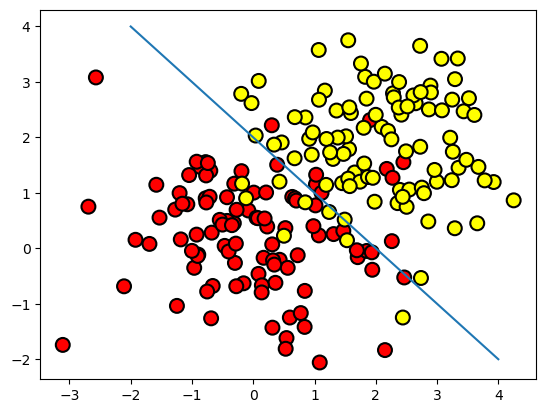

In [69]:
plt.scatter(train_data[0], train_data[1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [70]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

*попробуйте при разной глубине*

C:\Users\andru\AppData\Local\Temp\ipykernel_16696\2109618925.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


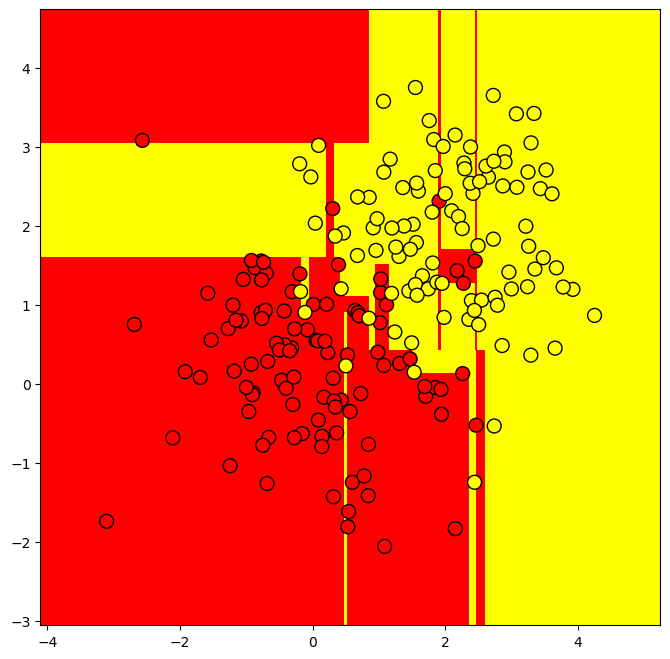

In [79]:
clf = test_clf(DecisionTreeClassifier(max_depth=10), train_data, train_labels, cmap='autumn', fit_clf=True)

C:\Users\andru\AppData\Local\Temp\ipykernel_16696\2109618925.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


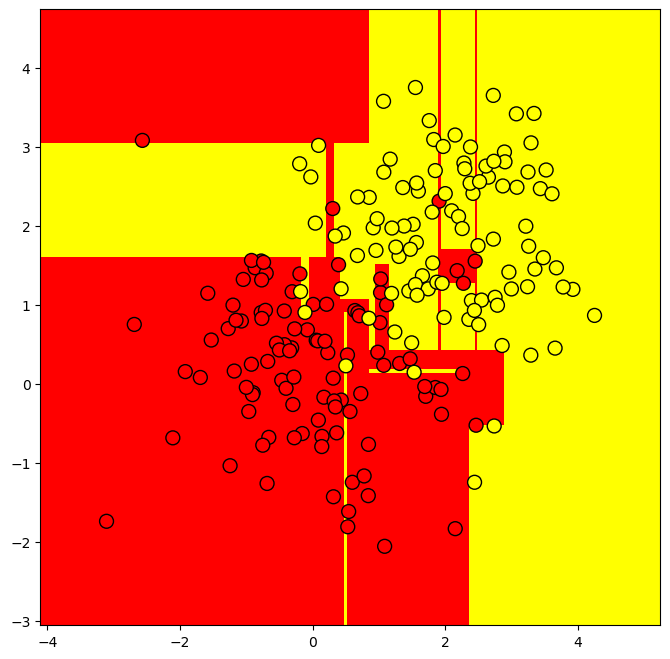

In [80]:
clf = test_clf(DecisionTreeClassifier(), train_data, train_labels, cmap='autumn', fit_clf=True)

### Визуализация дерева прямо в ноутбуке

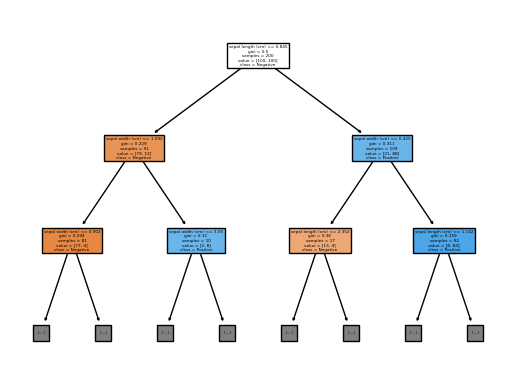

In [81]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tree.plot_tree(clf, feature_names=list(X),max_depth=2,
               class_names = ['Negative','Positive'],
               filled = True);

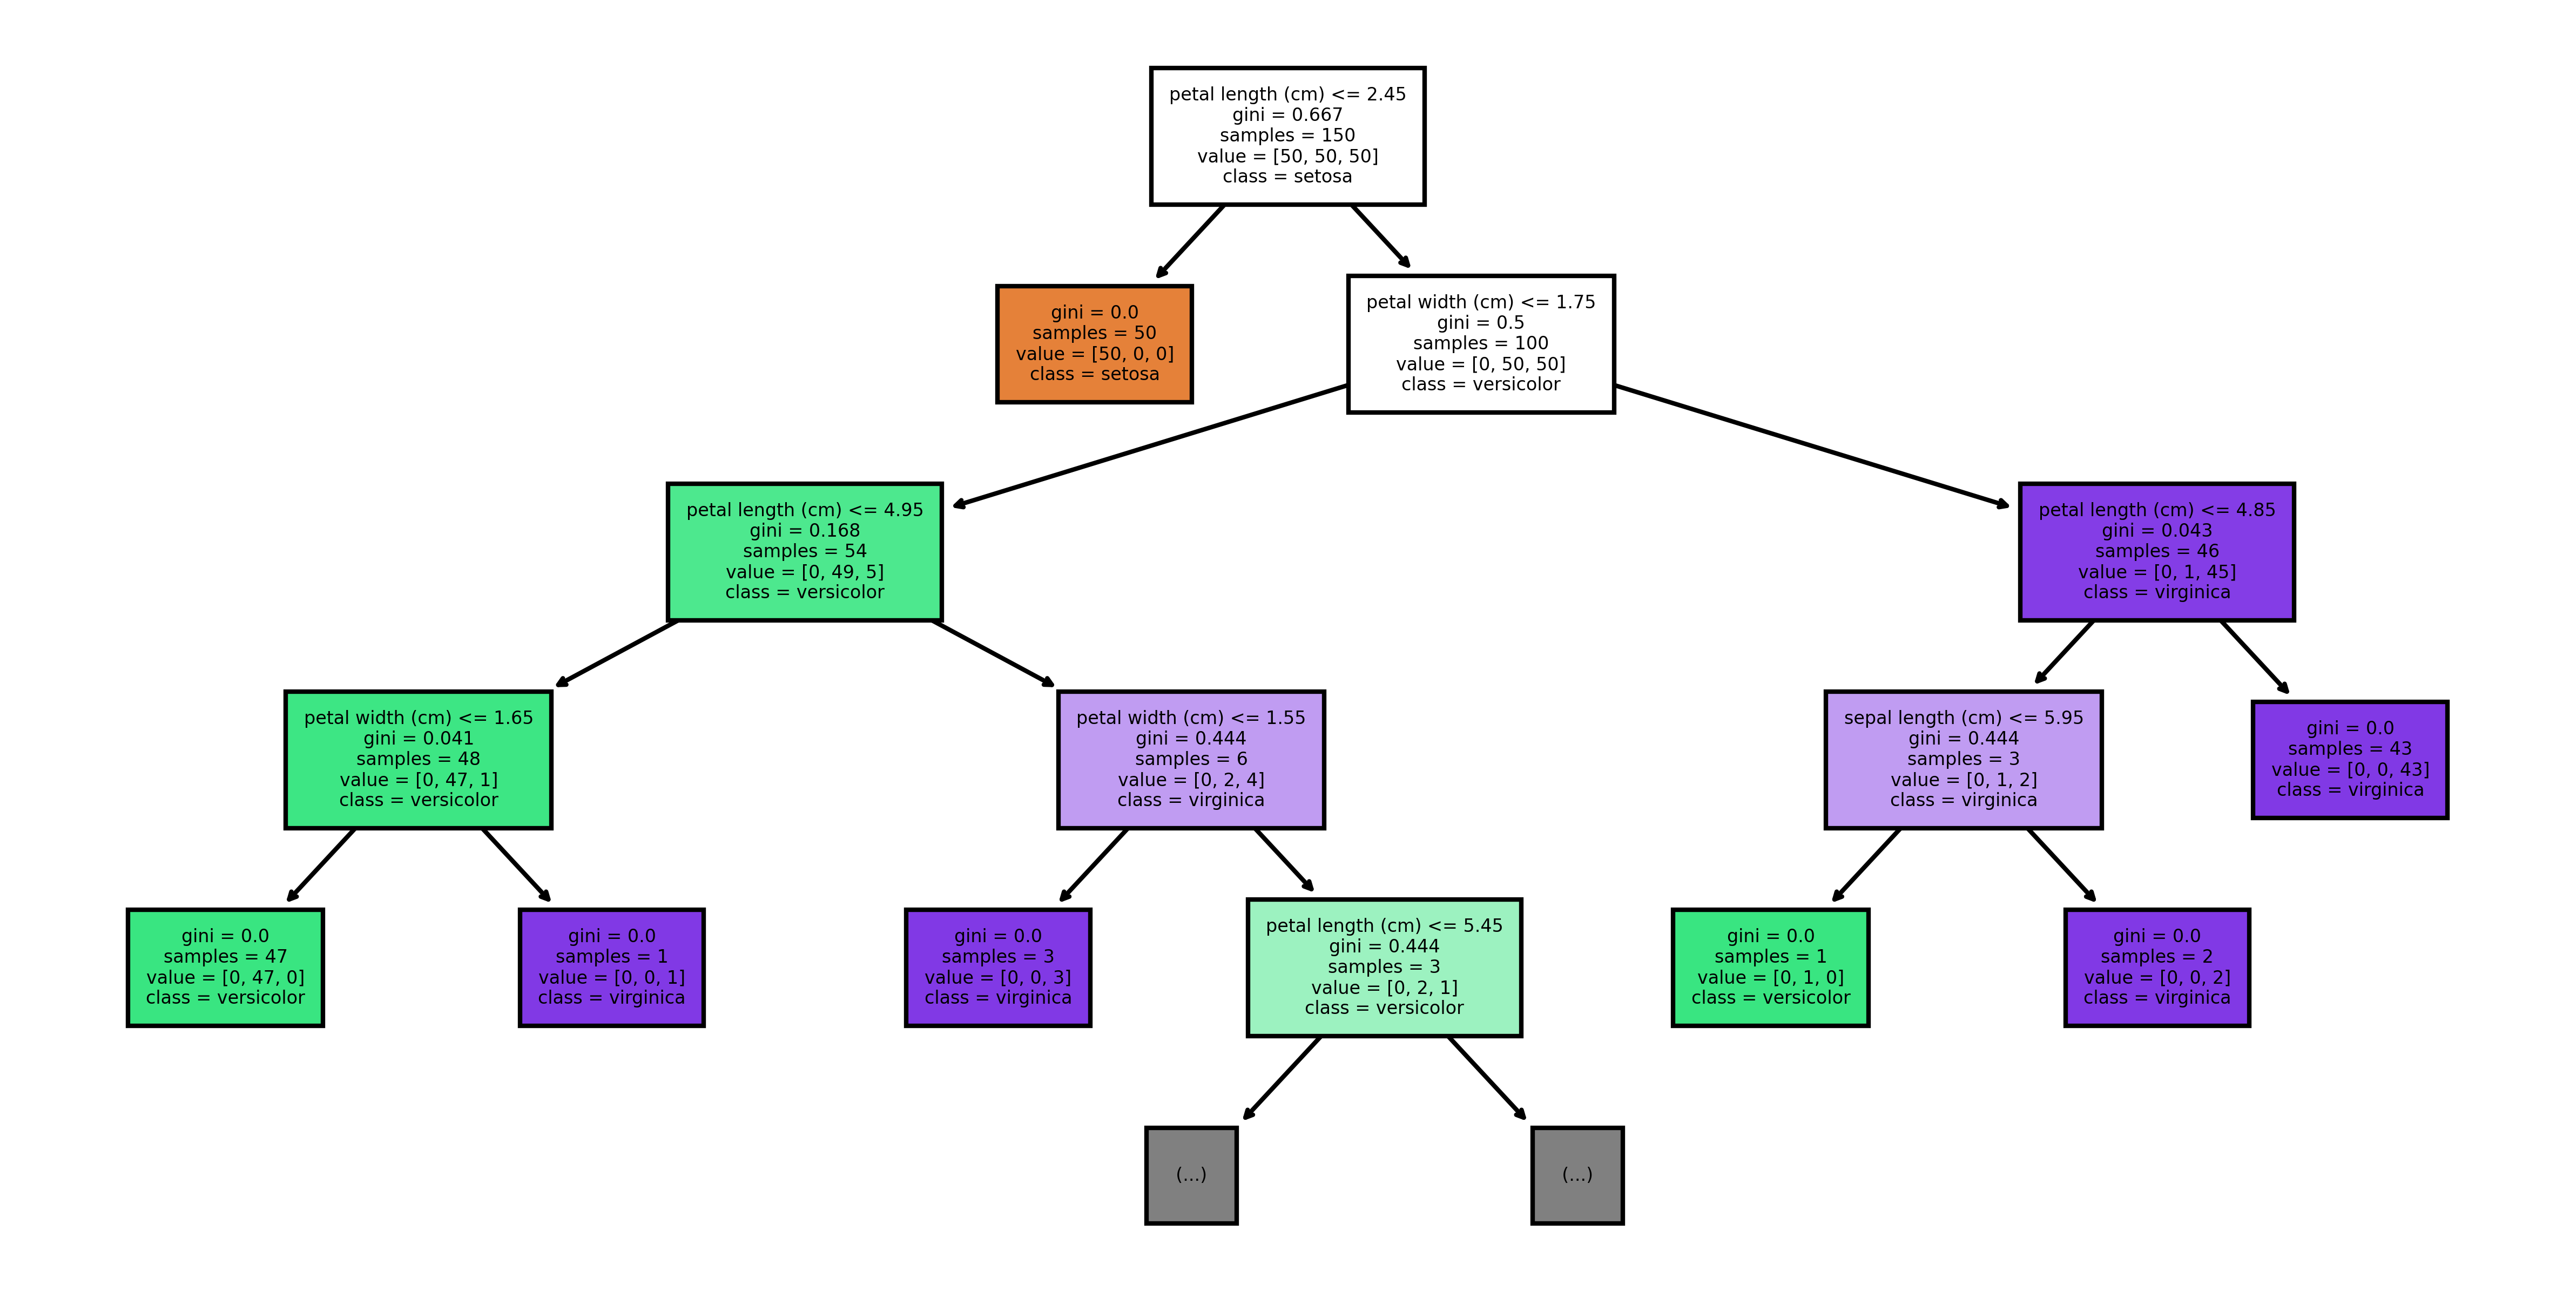

In [100]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=600)
tree.plot_tree(clf, max_depth=4,
               feature_names = fn, 
               class_names=cn, fontsize=4,
               filled = True);

In [103]:
X.loc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [115]:
np.array([5.1,3.5,1.4,0,2]).reshape(1,-1)

array([[5.1, 3.5, 1.4, 0. , 2. ]])

In [125]:
#clf.predict(np.array([5.1,3.5,1.4,np.nan]).reshape(1,-1))

c:\Users\andru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [120]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


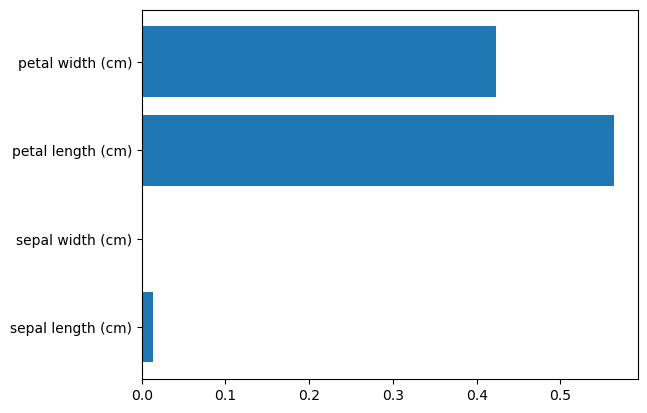

In [98]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);

### Задание

1. Постройте дерево решений на датасет Iris (везде использовать random_state=42)
2. Оцените работу алгоритма метрикой accuracy
3. Попробуйте улучшить результат подобрав параметры алгоритма.
4. Выполнить визуализацию.

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [164]:
from sklearn.datasets import load_iris
iris = load_iris()


X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, shuffle = True, stratify = y)

In [201]:
random_state=42clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [202]:
predicted = clf.predict(X_test)

In [203]:
print(accuracy_score(y_test,predicted))

0.9333333333333333


In [189]:
grid = {'max_depth': [3, 4, 5]}
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=42), grid, scoring='roc_auc', cv=3, n_jobs=-1)

In [190]:
%%time
gridsearch.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 32 ms


c:\Users\andru\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5]}, scoring='roc_auc')

In [191]:
gridsearch.best_params_

{'max_depth': 3}

In [195]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42 )
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [196]:
predicted = clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.9666666666666667


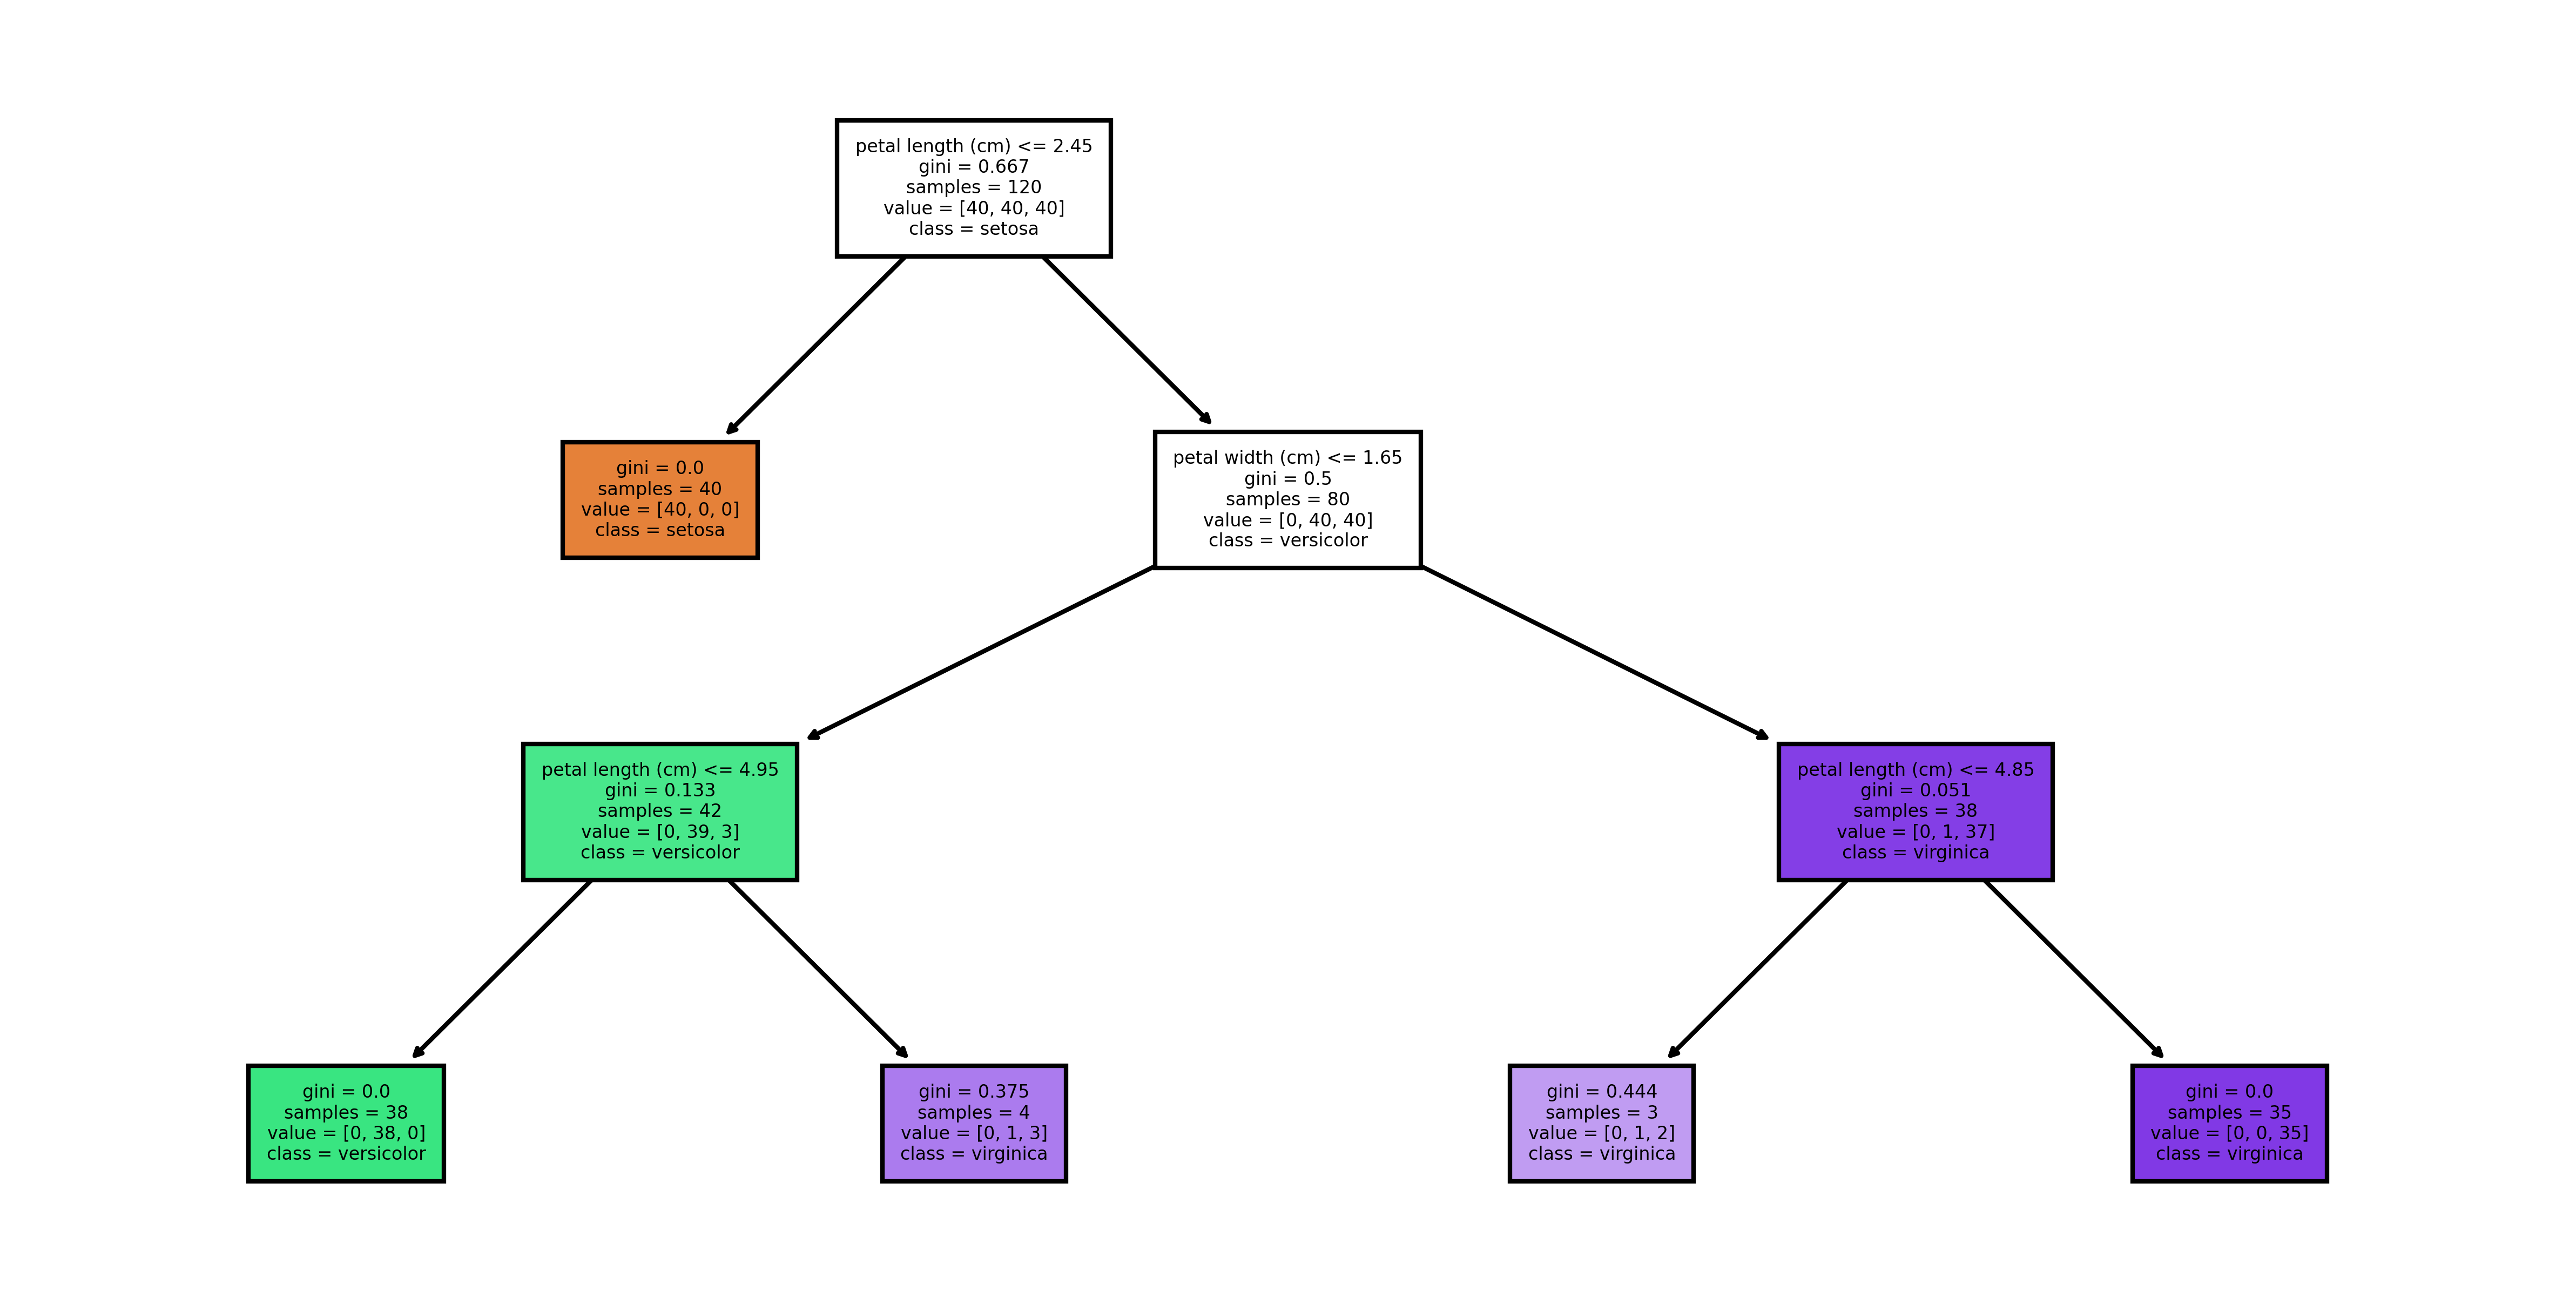

In [197]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=600)
tree.plot_tree(clf, max_depth=3,
               feature_names = fn, 
               class_names=cn, fontsize=4,
               filled = True);